In [2]:
!pip install gym==0.24.1
!pip install pygame

  Using cached gym-0.24.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.5.0 requires gym==0.21, but you have gym 0.24.1 which is incompatible.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

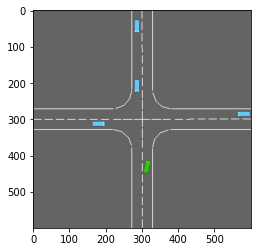

In [3]:
import gym
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('intersection-v0')
env.seed(0)

# env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
# env.configure({"vehicles_count": 0})  # A single other vehicle, for the sake of visualisation
# env.configure({ "screen_width": 1000, "screen_height": 400})
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()
# TODO: Check why if I put two controlled vehicles and no vehicles
# in the background still 1 controlled vehicle and 4 in the background appear

In [4]:
import pprint
pprint.pprint(env.config)

{'action': {'lateral': False,
            'longitudinal': True,
            'target_speeds': [0, 4.5, 9],
            'type': 'DiscreteMetaAction'},
 'arrived_reward': 30,
 'centering_position': [0.5, 0.5],
 'collision_reward': -100,
 'controlled_vehicles': 1,
 'destination': 'o1',
 'duration': 13,
 'hash_intersection': False,
 'high_speed_reward': 1,
 'initial_vehicle_count': 10,
 'manual_control': False,
 'normalize_reward': False,
 'observation': {'absolute': True,
                 'features': ['presence',
                              'x',
                              'y',
                              'vx',
                              'vy',
                              'cos_h',
                              'sin_h'],
                 'features_range': {'vx': [-20, 20],
                                    'vy': [-20, 20],
                                    'x': [-100, 100],
                                    'y': [-100, 100]},
                 'flatten': False,
              

In [5]:
!pip install stable-baselines3
!python -m pip uninstall pyserial --yes
!pip install protobuf==3.19.0
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.24.1
    Uninstalling gym-0.24.1:
      Successfully uninstalled gym-0.24.1
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [6]:

from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="intersection_dqn/")
model.learn(int(2e4))
model.save("intersection_dqn/model")

# Load and test saved model
model = DQN.load("intersection_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to intersection_dqn/DQN_1


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.75     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15       |
|    time_elapsed     | 0        |
|    total_timesteps  | 15       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.25     |
|    ep_rew_mean      | 1        |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 16       |
|    time_elapsed     | 3        |
|    total_timesteps  | 58       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.67     |
|    ep_rew_mean      | 0.667    |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 17       |
|    time_elapsed     | 5        |
|    total_timesteps  | 92       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.69     |
|    ep_rew_mean      | 0.875    |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 17       |
|    time_elapsed     | 7        |
|    total_timesteps  | 123      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 1.15     |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 17       |
|    time_elapsed     | 8        |
|    total_timesteps  | 150      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.75     |
|    ep_rew_mean      | 1.46     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 17       |
|    time_elapsed     | 10       |
|    total_timesteps  | 186      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.61     |
|    ep_rew_mean      | 1.61     |
|    exploration_rate | 0.899    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 17       |
|    time_elapsed     | 11       |
|    total_timesteps  | 213      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.065    |
|    n_updates        | 12       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.41     |
|    ep_rew_mean      | 1.66     |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 18       |
|    time_elapsed     | 13       |
|    total_timesteps  | 237      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00845  |
|    n_updates        | 36       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.14     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 18       |
|    time_elapsed     | 14       |
|    total_timesteps  | 257      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0285   |
|    n_updates        | 56       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.3      |
|    ep_rew_mean      | 1.82     |
|    exploration_rate | 0.861    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 18       |
|    time_elapsed     | 16       |
|    total_timesteps  | 292      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0165   |
|    n_updates        | 91       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.02     |
|    ep_rew_mean      | 1.75     |
|    exploration_rate | 0.853    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 17       |
|    time_elapsed     | 17       |
|    total_timesteps  | 309      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.11     |
|    n_updates        | 108      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.06     |
|    ep_rew_mean      | 1.69     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 17       |
|    time_elapsed     | 19       |
|    total_timesteps  | 339      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0202   |
|    n_updates        | 138      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.21     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.822    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 18       |
|    time_elapsed     | 20       |
|    total_timesteps  | 375      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.068    |
|    n_updates        | 174      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.04     |
|    ep_rew_mean      | 1.62     |
|    exploration_rate | 0.813    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 17       |
|    time_elapsed     | 22       |
|    total_timesteps  | 394      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0888   |
|    n_updates        | 193      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.1      |
|    ep_rew_mean      | 1.73     |
|    exploration_rate | 0.798    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 17       |
|    time_elapsed     | 23       |
|    total_timesteps  | 426      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0545   |
|    n_updates        | 225      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.08     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.785    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 17       |
|    time_elapsed     | 25       |
|    total_timesteps  | 453      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.103    |
|    n_updates        | 252      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.34     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.763    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 17       |
|    time_elapsed     | 27       |
|    total_timesteps  | 499      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0815   |
|    n_updates        | 298      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.755    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 17       |
|    time_elapsed     | 28       |
|    total_timesteps  | 516      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0874   |
|    n_updates        | 315      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.29     |
|    ep_rew_mean      | 1.7      |
|    exploration_rate | 0.737    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 17       |
|    time_elapsed     | 30       |
|    total_timesteps  | 554      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0554   |
|    n_updates        | 353      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.3      |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.723    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 18       |
|    time_elapsed     | 32       |
|    total_timesteps  | 584      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.192    |
|    n_updates        | 383      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.25     |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.711    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 17       |
|    time_elapsed     | 33       |
|    total_timesteps  | 609      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.181    |
|    n_updates        | 408      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.35     |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.693    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 17       |
|    time_elapsed     | 36       |
|    total_timesteps  | 647      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.142    |
|    n_updates        | 446      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.32     |
|    ep_rew_mean      | 1.84     |
|    exploration_rate | 0.68     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 17       |
|    time_elapsed     | 37       |
|    total_timesteps  | 673      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.101    |
|    n_updates        | 472      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.3      |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.667    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 17       |
|    time_elapsed     | 39       |
|    total_timesteps  | 701      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.112    |
|    n_updates        | 500      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.31     |
|    ep_rew_mean      | 1.8      |
|    exploration_rate | 0.653    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 17       |
|    time_elapsed     | 41       |
|    total_timesteps  | 731      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.182    |
|    n_updates        | 530      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.53     |
|    ep_rew_mean      | 1.87     |
|    exploration_rate | 0.635    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 17       |
|    time_elapsed     | 43       |
|    total_timesteps  | 768      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0675   |
|    n_updates        | 567      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.33     |
|    ep_rew_mean      | 1.81     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 17       |
|    time_elapsed     | 44       |
|    total_timesteps  | 791      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0942   |
|    n_updates        | 590      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.27     |
|    ep_rew_mean      | 1.85     |
|    exploration_rate | 0.611    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 17       |
|    time_elapsed     | 45       |
|    total_timesteps  | 819      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0896   |
|    n_updates        | 618      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.05     |
|    ep_rew_mean      | 1.79     |
|    exploration_rate | 0.607    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 17       |
|    time_elapsed     | 46       |
|    total_timesteps  | 828      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.206    |
|    n_updates        | 627      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.13     |
|    ep_rew_mean      | 1.74     |
|    exploration_rate | 0.59     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 17       |
|    time_elapsed     | 48       |
|    total_timesteps  | 863      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.182    |
|    n_updates        | 662      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.2      |
|    ep_rew_mean      | 1.76     |
|    exploration_rate | 0.57     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 18       |
|    time_elapsed     | 50       |
|    total_timesteps  | 906      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.128    |
|    n_updates        | 705      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.22     |
|    ep_rew_mean      | 1.71     |
|    exploration_rate | 0.556    |
| time/               |          |
|    episodes         | 128      |
|    fps              | 17       |
|    time_elapsed     | 52       |
|    total_timesteps  | 935      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.153    |
|    n_updates        | 734      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.04     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.553    |
| time/               |          |
|    episodes         | 132      |
|    fps              | 17       |
|    time_elapsed     | 52       |
|    total_timesteps  | 941      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.157    |
|    n_updates        | 740      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.07     |
|    ep_rew_mean      | 1.63     |
|    exploration_rate | 0.542    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 17       |
|    time_elapsed     | 53       |
|    total_timesteps  | 964      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0841   |
|    n_updates        | 763      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.01     |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.528    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 17       |
|    time_elapsed     | 55       |
|    total_timesteps  | 993      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0741   |
|    n_updates        | 792      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.02     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.52     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 17       |
|    time_elapsed     | 56       |
|    total_timesteps  | 1011     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.124    |
|    n_updates        | 810      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.98     |
|    ep_rew_mean      | 1.49     |
|    exploration_rate | 0.507    |
| time/               |          |
|    episodes         | 148      |
|    fps              | 17       |
|    time_elapsed     | 58       |
|    total_timesteps  | 1037     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.112    |
|    n_updates        | 836      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.96     |
|    ep_rew_mean      | 1.58     |
|    exploration_rate | 0.491    |
| time/               |          |
|    episodes         | 152      |
|    fps              | 17       |
|    time_elapsed     | 59       |
|    total_timesteps  | 1071     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.133    |
|    n_updates        | 870      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observati

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.96     |
|    ep_rew_mean      | 1.52     |
|    exploration_rate | 0.482    |
| time/               |          |
|    episodes         | 156      |
|    fps              | 17       |
|    time_elapsed     | 61       |
|    total_timesteps  | 1090     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0449   |
|    n_updates        | 889      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.01     |
|    ep_rew_mean      | 1.48     |
|    exploration_rate | 0.465    |
| time/               |          |
|    episodes         | 160      |
|    fps              | 17       |
|    time_elapsed     | 62       |
|    total_timesteps  | 1127     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.116    |
|    n_updates        | 926      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7        |
|    ep_rew_mean      | 1.51     |
|    exploration_rate | 0.452    |
| time/               |          |
|    episodes         | 164      |
|    fps              | 17       |
|    time_elapsed     | 64       |
|    total_timesteps  | 1153     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0985   |
|    n_updates        | 952      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.81     |
|    ep_rew_mean      | 1.57     |
|    exploration_rate | 0.44     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 18       |
|    time_elapsed     | 65       |
|    total_timesteps  | 1180     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0632   |
|    n_updates        | 979      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.96     |
|    ep_rew_mean      | 1.64     |
|    exploration_rate | 0.424    |
| time/               |          |
|    episodes         | 172      |
|    fps              | 18       |
|    time_elapsed     | 67       |
|    total_timesteps  | 1212     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.037    |
|    n_updates        | 1011     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.87     |
|    ep_rew_mean      | 1.65     |
|    exploration_rate | 0.411    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 17       |
|    time_elapsed     | 68       |
|    total_timesteps  | 1241     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0643   |
|    n_updates        | 1040     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.93     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.393    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 17       |
|    time_elapsed     | 70       |
|    total_timesteps  | 1277     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0837   |
|    n_updates        | 1076     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.9      |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.383    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 17       |
|    time_elapsed     | 72       |
|    total_timesteps  | 1299     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0688   |
|    n_updates        | 1098     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.81     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.369    |
| time/               |          |
|    episodes         | 188      |
|    fps              | 17       |
|    time_elapsed     | 73       |
|    total_timesteps  | 1328     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0938   |
|    n_updates        | 1127     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.86     |
|    ep_rew_mean      | 1.67     |
|    exploration_rate | 0.354    |
| time/               |          |
|    episodes         | 192      |
|    fps              | 17       |
|    time_elapsed     | 75       |
|    total_timesteps  | 1359     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.123    |
|    n_updates        | 1158     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.89     |
|    ep_rew_mean      | 1.72     |
|    exploration_rate | 0.34     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 17       |
|    time_elapsed     | 77       |
|    total_timesteps  | 1390     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.114    |
|    n_updates        | 1189     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.72     |
|    ep_rew_mean      | 1.68     |
|    exploration_rate | 0.334    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 17       |
|    time_elapsed     | 77       |
|    total_timesteps  | 1403     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0825   |
|    n_updates        | 1202     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.73     |
|    ep_rew_mean      | 1.77     |
|    exploration_rate | 0.316    |
| time/               |          |
|    episodes         | 204      |
|    fps              | 18       |
|    time_elapsed     | 79       |
|    total_timesteps  | 1441     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.101    |
|    n_updates        | 1240     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.77     |
|    ep_rew_mean      | 1.83     |
|    exploration_rate | 0.303    |
| time/               |          |
|    episodes         | 208      |
|    fps              | 18       |
|    time_elapsed     | 81       |
|    total_timesteps  | 1468     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0661   |
|    n_updates        | 1267     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.73     |
|    ep_rew_mean      | 1.86     |
|    exploration_rate | 0.291    |
| time/               |          |
|    episodes         | 212      |
|    fps              | 18       |
|    time_elapsed     | 82       |
|    total_timesteps  | 1492     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0765   |
|    n_updates        | 1291     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.01     |
|    ep_rew_mean      | 2.02     |
|    exploration_rate | 0.274    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 18       |
|    time_elapsed     | 84       |
|    total_timesteps  | 1529     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0793   |
|    n_updates        | 1328     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.87     |
|    ep_rew_mean      | 2.05     |
|    exploration_rate | 0.264    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 18       |
|    time_elapsed     | 85       |
|    total_timesteps  | 1550     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.112    |
|    n_updates        | 1349     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.7      |
|    ep_rew_mean      | 2.01     |
|    exploration_rate | 0.251    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 18       |
|    time_elapsed     | 87       |
|    total_timesteps  | 1576     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.16     |
|    n_updates        | 1375     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.64     |
|    ep_rew_mean      | 2.03     |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 17       |
|    time_elapsed     | 88       |
|    total_timesteps  | 1599     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0606   |
|    n_updates        | 1398     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.98     |
|    ep_rew_mean      | 2.3      |
|    exploration_rate | 0.221    |
| time/               |          |
|    episodes         | 232      |
|    fps              | 18       |
|    time_elapsed     | 90       |
|    total_timesteps  | 1639     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0749   |
|    n_updates        | 1438     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.07     |
|    ep_rew_mean      | 2.41     |
|    exploration_rate | 0.206    |
| time/               |          |
|    episodes         | 236      |
|    fps              | 18       |
|    time_elapsed     | 92       |
|    total_timesteps  | 1671     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0884   |
|    n_updates        | 1470     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.06     |
|    ep_rew_mean      | 2.43     |
|    exploration_rate | 0.193    |
| time/               |          |
|    episodes         | 240      |
|    fps              | 18       |
|    time_elapsed     | 94       |
|    total_timesteps  | 1699     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.132    |
|    n_updates        | 1498     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.16     |
|    ep_rew_mean      | 2.56     |
|    exploration_rate | 0.18     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 17       |
|    time_elapsed     | 95       |
|    total_timesteps  | 1727     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0366   |
|    n_updates        | 1526     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.21     |
|    ep_rew_mean      | 2.57     |
|    exploration_rate | 0.165    |
| time/               |          |
|    episodes         | 248      |
|    fps              | 17       |
|    time_elapsed     | 97       |
|    total_timesteps  | 1758     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.128    |
|    n_updates        | 1557     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.02     |
|    ep_rew_mean      | 2.44     |
|    exploration_rate | 0.158    |
| time/               |          |
|    episodes         | 252      |
|    fps              | 17       |
|    time_elapsed     | 98       |
|    total_timesteps  | 1773     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0844   |
|    n_updates        | 1572     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.2      |
|    ep_rew_mean      | 2.57     |
|    exploration_rate | 0.14     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 18       |
|    time_elapsed     | 100      |
|    total_timesteps  | 1810     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0736   |
|    n_updates        | 1609     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.2      |
|    ep_rew_mean      | 2.7      |
|    exploration_rate | 0.123    |
| time/               |          |
|    episodes         | 260      |
|    fps              | 18       |
|    time_elapsed     | 102      |
|    total_timesteps  | 1847     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.134    |
|    n_updates        | 1646     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 2.74     |
|    exploration_rate | 0.112    |
| time/               |          |
|    episodes         | 264      |
|    fps              | 17       |
|    time_elapsed     | 103      |
|    total_timesteps  | 1870     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.064    |
|    n_updates        | 1669     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.14     |
|    ep_rew_mean      | 2.7      |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 268      |
|    fps              | 17       |
|    time_elapsed     | 105      |
|    total_timesteps  | 1894     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.116    |
|    n_updates        | 1693     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.12     |
|    ep_rew_mean      | 2.8      |
|    exploration_rate | 0.0861   |
| time/               |          |
|    episodes         | 272      |
|    fps              | 18       |
|    time_elapsed     | 106      |
|    total_timesteps  | 1924     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.112    |
|    n_updates        | 1723     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.14     |
|    ep_rew_mean      | 2.86     |
|    exploration_rate | 0.0714   |
| time/               |          |
|    episodes         | 276      |
|    fps              | 18       |
|    time_elapsed     | 108      |
|    total_timesteps  | 1955     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0795   |
|    n_updates        | 1754     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.06     |
|    ep_rew_mean      | 2.84     |
|    exploration_rate | 0.0581   |
| time/               |          |
|    episodes         | 280      |
|    fps              | 17       |
|    time_elapsed     | 110      |
|    total_timesteps  | 1983     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.129    |
|    n_updates        | 1782     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.13     |
|    ep_rew_mean      | 2.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 17       |
|    time_elapsed     | 112      |
|    total_timesteps  | 2012     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.14     |
|    n_updates        | 1811     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.94     |
|    ep_rew_mean      | 2.74     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 17       |
|    time_elapsed     | 112      |
|    total_timesteps  | 2022     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.113    |
|    n_updates        | 1821     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.82     |
|    ep_rew_mean      | 2.74     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 17       |
|    time_elapsed     | 114      |
|    total_timesteps  | 2041     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.184    |
|    n_updates        | 1840     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.93     |
|    ep_rew_mean      | 2.89     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 17       |
|    time_elapsed     | 116      |
|    total_timesteps  | 2083     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0645   |
|    n_updates        | 1882     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.03     |
|    ep_rew_mean      | 2.97     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 17       |
|    time_elapsed     | 118      |
|    total_timesteps  | 2106     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0949   |
|    n_updates        | 1905     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.96     |
|    ep_rew_mean      | 2.98     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 17       |
|    time_elapsed     | 119      |
|    total_timesteps  | 2137     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.179    |
|    n_updates        | 1936     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.99     |
|    ep_rew_mean      | 3.08     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 17       |
|    time_elapsed     | 121      |
|    total_timesteps  | 2167     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.173    |
|    n_updates        | 1966     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.05     |
|    ep_rew_mean      | 3.19     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 17       |
|    time_elapsed     | 122      |
|    total_timesteps  | 2197     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0715   |
|    n_updates        | 1996     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.98     |
|    ep_rew_mean      | 3.21     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 17       |
|    time_elapsed     | 124      |
|    total_timesteps  | 2227     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.104    |
|    n_updates        | 2026     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.99     |
|    ep_rew_mean      | 3.14     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 17       |
|    time_elapsed     | 125      |
|    total_timesteps  | 2249     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0859   |
|    n_updates        | 2048     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.15     |
|    ep_rew_mean      | 3.3      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 17       |
|    time_elapsed     | 127      |
|    total_timesteps  | 2291     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0846   |
|    n_updates        | 2090     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.23     |
|    ep_rew_mean      | 3.31     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 17       |
|    time_elapsed     | 129      |
|    total_timesteps  | 2322     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0816   |
|    n_updates        | 2121     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.11     |
|    ep_rew_mean      | 3.2      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 17       |
|    time_elapsed     | 131      |
|    total_timesteps  | 2350     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.103    |
|    n_updates        | 2149     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7        |
|    ep_rew_mean      | 3.14     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 17       |
|    time_elapsed     | 132      |
|    total_timesteps  | 2371     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0743   |
|    n_updates        | 2170     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.03     |
|    ep_rew_mean      | 3.18     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 17       |
|    time_elapsed     | 134      |
|    total_timesteps  | 2402     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.189    |
|    n_updates        | 2201     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.08     |
|    ep_rew_mean      | 3.18     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 17       |
|    time_elapsed     | 135      |
|    total_timesteps  | 2435     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.128    |
|    n_updates        | 2234     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.13     |
|    ep_rew_mean      | 3.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 17       |
|    time_elapsed     | 137      |
|    total_timesteps  | 2471     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.241    |
|    n_updates        | 2270     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.16     |
|    ep_rew_mean      | 3.45     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 17       |
|    time_elapsed     | 138      |
|    total_timesteps  | 2489     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0673   |
|    n_updates        | 2288     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.93     |
|    ep_rew_mean      | 3.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 17       |
|    time_elapsed     | 139      |
|    total_timesteps  | 2503     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.392    |
|    n_updates        | 2302     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.76     |
|    ep_rew_mean      | 3.14     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 17       |
|    time_elapsed     | 140      |
|    total_timesteps  | 2523     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.155    |
|    n_updates        | 2322     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.93     |
|    ep_rew_mean      | 3.29     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 17       |
|    time_elapsed     | 143      |
|    total_timesteps  | 2563     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0863   |
|    n_updates        | 2362     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.05     |
|    ep_rew_mean      | 3.39     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 17       |
|    time_elapsed     | 145      |
|    total_timesteps  | 2599     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.15     |
|    n_updates        | 2398     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.15     |
|    ep_rew_mean      | 3.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 17       |
|    time_elapsed     | 147      |
|    total_timesteps  | 2639     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0987   |
|    n_updates        | 2438     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.18     |
|    ep_rew_mean      | 3.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 17       |
|    time_elapsed     | 148      |
|    total_timesteps  | 2673     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.118    |
|    n_updates        | 2472     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7        |
|    ep_rew_mean      | 3.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 17       |
|    time_elapsed     | 149      |
|    total_timesteps  | 2683     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0893   |
|    n_updates        | 2482     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7        |
|    ep_rew_mean      | 3.43     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 17       |
|    time_elapsed     | 150      |
|    total_timesteps  | 2712     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.128    |
|    n_updates        | 2511     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.23     |
|    ep_rew_mean      | 3.51     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 17       |
|    time_elapsed     | 152      |
|    total_timesteps  | 2745     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.205    |
|    n_updates        | 2544     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.33     |
|    ep_rew_mean      | 3.56     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 17       |
|    time_elapsed     | 154      |
|    total_timesteps  | 2774     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.143    |
|    n_updates        | 2573     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.27     |
|    ep_rew_mean      | 3.38     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 17       |
|    time_elapsed     | 156      |
|    total_timesteps  | 2810     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.117    |
|    n_updates        | 2609     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.37     |
|    ep_rew_mean      | 3.47     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 17       |
|    time_elapsed     | 157      |
|    total_timesteps  | 2843     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0505   |
|    n_updates        | 2642     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.48     |
|    ep_rew_mean      | 3.49     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 18       |
|    time_elapsed     | 160      |
|    total_timesteps  | 2885     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.162    |
|    n_updates        | 2684     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 3.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 18       |
|    time_elapsed     | 162      |
|    total_timesteps  | 2917     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0721   |
|    n_updates        | 2716     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.44     |
|    ep_rew_mean      | 3.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 17       |
|    time_elapsed     | 163      |
|    total_timesteps  | 2941     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.191    |
|    n_updates        | 2740     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.63     |
|    ep_rew_mean      | 3.5      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 18       |
|    time_elapsed     | 166      |
|    total_timesteps  | 2990     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.096    |
|    n_updates        | 2789     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.63     |
|    ep_rew_mean      | 3.59     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 420      |
|    fps              | 17       |
|    time_elapsed     | 167      |
|    total_timesteps  | 3012     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.102    |
|    n_updates        | 2811     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.4      |
|    ep_rew_mean      | 3.42     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 17       |
|    time_elapsed     | 168      |
|    total_timesteps  | 3031     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.151    |
|    n_updates        | 2830     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.61     |
|    ep_rew_mean      | 3.59     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 17       |
|    time_elapsed     | 171      |
|    total_timesteps  | 3083     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.155    |
|    n_updates        | 2882     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.51     |
|    ep_rew_mean      | 3.47     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 17       |
|    time_elapsed     | 172      |
|    total_timesteps  | 3101     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0602   |
|    n_updates        | 2900     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.53     |
|    ep_rew_mean      | 3.51     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 17       |
|    time_elapsed     | 173      |
|    total_timesteps  | 3124     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.152    |
|    n_updates        | 2923     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.59     |
|    ep_rew_mean      | 3.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 17       |
|    time_elapsed     | 175      |
|    total_timesteps  | 3161     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.27     |
|    n_updates        | 2960     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.54     |
|    ep_rew_mean      | 3.57     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 17       |
|    time_elapsed     | 177      |
|    total_timesteps  | 3189     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.147    |
|    n_updates        | 2988     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 3.54     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 17       |
|    time_elapsed     | 178      |
|    total_timesteps  | 3221     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.156    |
|    n_updates        | 3020     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.66     |
|    ep_rew_mean      | 3.55     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 452      |
|    fps              | 18       |
|    time_elapsed     | 180      |
|    total_timesteps  | 3255     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.123    |
|    n_updates        | 3054     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8        |
|    ep_rew_mean      | 3.85     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 18       |
|    time_elapsed     | 183      |
|    total_timesteps  | 3303     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0404   |
|    n_updates        | 3102     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.32     |
|    ep_rew_mean      | 4.2      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 18       |
|    time_elapsed     | 186      |
|    total_timesteps  | 3355     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.142    |
|    n_updates        | 3154     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.24     |
|    ep_rew_mean      | 4.1      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 17       |
|    time_elapsed     | 188      |
|    total_timesteps  | 3387     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0734   |
|    n_updates        | 3186     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.27     |
|    ep_rew_mean      | 4.07     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 18       |
|    time_elapsed     | 190      |
|    total_timesteps  | 3426     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.179    |
|    n_updates        | 3225     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.17     |
|    ep_rew_mean      | 3.98     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 18       |
|    time_elapsed     | 191      |
|    total_timesteps  | 3456     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.108    |
|    n_updates        | 3255     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.23     |
|    ep_rew_mean      | 4.06     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 18       |
|    time_elapsed     | 193      |
|    total_timesteps  | 3496     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.163    |
|    n_updates        | 3295     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.45     |
|    ep_rew_mean      | 4.18     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 480      |
|    fps              | 18       |
|    time_elapsed     | 195      |
|    total_timesteps  | 3528     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.224    |
|    n_updates        | 3327     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.58     |
|    ep_rew_mean      | 4.29     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 18       |
|    time_elapsed     | 197      |
|    total_timesteps  | 3570     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.132    |
|    n_updates        | 3369     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.6      |
|    ep_rew_mean      | 4.43     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 18       |
|    time_elapsed     | 199      |
|    total_timesteps  | 3605     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.101    |
|    n_updates        | 3404     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.65     |
|    ep_rew_mean      | 4.42     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 492      |
|    fps              | 18       |
|    time_elapsed     | 201      |
|    total_timesteps  | 3639     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.125    |
|    n_updates        | 3438     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.6      |
|    ep_rew_mean      | 4.52     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 496      |
|    fps              | 18       |
|    time_elapsed     | 203      |
|    total_timesteps  | 3670     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0729   |
|    n_updates        | 3469     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.58     |
|    ep_rew_mean      | 4.52     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 500      |
|    fps              | 18       |
|    time_elapsed     | 205      |
|    total_timesteps  | 3701     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.128    |
|    n_updates        | 3500     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.24     |
|    ep_rew_mean      | 4.33     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 504      |
|    fps              | 18       |
|    time_elapsed     | 205      |
|    total_timesteps  | 3709     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0987   |
|    n_updates        | 3508     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.13     |
|    ep_rew_mean      | 4.27     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 508      |
|    fps              | 18       |
|    time_elapsed     | 206      |
|    total_timesteps  | 3730     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.227    |
|    n_updates        | 3529     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.31     |
|    ep_rew_mean      | 4.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 18       |
|    time_elapsed     | 208      |
|    total_timesteps  | 3772     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.316    |
|    n_updates        | 3571     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.12     |
|    ep_rew_mean      | 4.32     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 516      |
|    fps              | 18       |
|    time_elapsed     | 210      |
|    total_timesteps  | 3802     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0623   |
|    n_updates        | 3601     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.31     |
|    ep_rew_mean      | 4.45     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 18       |
|    time_elapsed     | 212      |
|    total_timesteps  | 3843     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.237    |
|    n_updates        | 3642     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.52     |
|    ep_rew_mean      | 4.61     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 18       |
|    time_elapsed     | 214      |
|    total_timesteps  | 3883     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.141    |
|    n_updates        | 3682     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.43     |
|    ep_rew_mean      | 4.56     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 18       |
|    time_elapsed     | 217      |
|    total_timesteps  | 3926     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.204    |
|    n_updates        | 3725     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.5      |
|    ep_rew_mean      | 4.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 18       |
|    time_elapsed     | 218      |
|    total_timesteps  | 3951     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.285    |
|    n_updates        | 3750     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.6      |
|    ep_rew_mean      | 4.68     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 18       |
|    time_elapsed     | 220      |
|    total_timesteps  | 3984     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0874   |
|    n_updates        | 3783     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.65     |
|    ep_rew_mean      | 4.65     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 18       |
|    time_elapsed     | 222      |
|    total_timesteps  | 4026     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.156    |
|    n_updates        | 3825     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.58     |
|    ep_rew_mean      | 4.59     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 18       |
|    time_elapsed     | 223      |
|    total_timesteps  | 4047     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.246    |
|    n_updates        | 3846     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.68     |
|    ep_rew_mean      | 4.69     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 18       |
|    time_elapsed     | 226      |
|    total_timesteps  | 4089     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.257    |
|    n_updates        | 3888     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.62     |
|    ep_rew_mean      | 4.77     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 552      |
|    fps              | 18       |
|    time_elapsed     | 227      |
|    total_timesteps  | 4117     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0979   |
|    n_updates        | 3916     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.48     |
|    ep_rew_mean      | 4.61     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 556      |
|    fps              | 18       |
|    time_elapsed     | 229      |
|    total_timesteps  | 4151     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.25     |
|    n_updates        | 3950     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.24     |
|    ep_rew_mean      | 4.44     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 560      |
|    fps              | 18       |
|    time_elapsed     | 231      |
|    total_timesteps  | 4179     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.38     |
|    n_updates        | 3978     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.12     |
|    ep_rew_mean      | 4.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 564      |
|    fps              | 18       |
|    time_elapsed     | 232      |
|    total_timesteps  | 4199     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.152    |
|    n_updates        | 3998     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.03     |
|    ep_rew_mean      | 4.38     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 568      |
|    fps              | 18       |
|    time_elapsed     | 234      |
|    total_timesteps  | 4229     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.117    |
|    n_updates        | 4028     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.91     |
|    ep_rew_mean      | 4.29     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 572      |
|    fps              | 18       |
|    time_elapsed     | 235      |
|    total_timesteps  | 4247     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.37     |
|    n_updates        | 4046     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.69     |
|    ep_rew_mean      | 4.13     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 576      |
|    fps              | 18       |
|    time_elapsed     | 236      |
|    total_timesteps  | 4265     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0922   |
|    n_updates        | 4064     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.72     |
|    ep_rew_mean      | 4.16     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 18       |
|    time_elapsed     | 238      |
|    total_timesteps  | 4300     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.251    |
|    n_updates        | 4099     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.7      |
|    ep_rew_mean      | 4.06     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 18       |
|    time_elapsed     | 240      |
|    total_timesteps  | 4340     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0894   |
|    n_updates        | 4139     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.68     |
|    ep_rew_mean      | 4.01     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 18       |
|    time_elapsed     | 242      |
|    total_timesteps  | 4373     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0845   |
|    n_updates        | 4172     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.46     |
|    ep_rew_mean      | 3.89     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 592      |
|    fps              | 18       |
|    time_elapsed     | 243      |
|    total_timesteps  | 4385     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.207    |
|    n_updates        | 4184     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.43     |
|    ep_rew_mean      | 3.79     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 596      |
|    fps              | 18       |
|    time_elapsed     | 245      |
|    total_timesteps  | 4413     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.11     |
|    n_updates        | 4212     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.34     |
|    ep_rew_mean      | 3.7      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 18       |
|    time_elapsed     | 246      |
|    total_timesteps  | 4435     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0765   |
|    n_updates        | 4234     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.58     |
|    ep_rew_mean      | 3.88     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 604      |
|    fps              | 18       |
|    time_elapsed     | 248      |
|    total_timesteps  | 4467     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.134    |
|    n_updates        | 4266     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.77     |
|    ep_rew_mean      | 4.03     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 608      |
|    fps              | 17       |
|    time_elapsed     | 250      |
|    total_timesteps  | 4507     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.144    |
|    n_updates        | 4306     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.65     |
|    ep_rew_mean      | 3.94     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 612      |
|    fps              | 18       |
|    time_elapsed     | 252      |
|    total_timesteps  | 4537     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.31     |
|    n_updates        | 4336     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.66     |
|    ep_rew_mean      | 3.93     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 616      |
|    fps              | 17       |
|    time_elapsed     | 253      |
|    total_timesteps  | 4568     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.225    |
|    n_updates        | 4367     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.45     |
|    ep_rew_mean      | 3.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 17       |
|    time_elapsed     | 254      |
|    total_timesteps  | 4588     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.203    |
|    n_updates        | 4387     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.47     |
|    ep_rew_mean      | 3.81     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 17       |
|    time_elapsed     | 257      |
|    total_timesteps  | 4630     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0763   |
|    n_updates        | 4429     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.35     |
|    ep_rew_mean      | 3.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 628      |
|    fps              | 17       |
|    time_elapsed     | 259      |
|    total_timesteps  | 4661     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0882   |
|    n_updates        | 4460     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.41     |
|    ep_rew_mean      | 3.86     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 632      |
|    fps              | 17       |
|    time_elapsed     | 261      |
|    total_timesteps  | 4692     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.203    |
|    n_updates        | 4491     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 3.67     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 636      |
|    fps              | 17       |
|    time_elapsed     | 261      |
|    total_timesteps  | 4701     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.1      |
|    n_updates        | 4500     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.97     |
|    ep_rew_mean      | 3.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 17       |
|    time_elapsed     | 262      |
|    total_timesteps  | 4723     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0787   |
|    n_updates        | 4522     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.98     |
|    ep_rew_mean      | 3.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 17       |
|    time_elapsed     | 264      |
|    total_timesteps  | 4745     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.331    |
|    n_updates        | 4544     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.8      |
|    ep_rew_mean      | 3.43     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 17       |
|    time_elapsed     | 265      |
|    total_timesteps  | 4769     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.208    |
|    n_updates        | 4568     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.69     |
|    ep_rew_mean      | 3.3      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 17       |
|    time_elapsed     | 266      |
|    total_timesteps  | 4786     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.263    |
|    n_updates        | 4585     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.65     |
|    ep_rew_mean      | 3.3      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 17       |
|    time_elapsed     | 268      |
|    total_timesteps  | 4816     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.308    |
|    n_updates        | 4615     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.57     |
|    ep_rew_mean      | 3.21     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 17       |
|    time_elapsed     | 269      |
|    total_timesteps  | 4836     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.134    |
|    n_updates        | 4635     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.7      |
|    ep_rew_mean      | 3.22     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 17       |
|    time_elapsed     | 271      |
|    total_timesteps  | 4869     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.145    |
|    n_updates        | 4668     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.73     |
|    ep_rew_mean      | 3.17     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 668      |
|    fps              | 17       |
|    time_elapsed     | 272      |
|    total_timesteps  | 4902     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.153    |
|    n_updates        | 4701     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.9      |
|    ep_rew_mean      | 3.23     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 672      |
|    fps              | 17       |
|    time_elapsed     | 274      |
|    total_timesteps  | 4937     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.23     |
|    n_updates        | 4736     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.05     |
|    ep_rew_mean      | 3.32     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 17       |
|    time_elapsed     | 276      |
|    total_timesteps  | 4970     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.358    |
|    n_updates        | 4769     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.97     |
|    ep_rew_mean      | 3.26     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 17       |
|    time_elapsed     | 278      |
|    total_timesteps  | 4997     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.294    |
|    n_updates        | 4796     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.9      |
|    ep_rew_mean      | 3.25     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 17       |
|    time_elapsed     | 280      |
|    total_timesteps  | 5030     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.123    |
|    n_updates        | 4829     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.9      |
|    ep_rew_mean      | 3.24     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 17       |
|    time_elapsed     | 282      |
|    total_timesteps  | 5063     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.318    |
|    n_updates        | 4862     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.2      |
|    ep_rew_mean      | 3.49     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 17       |
|    time_elapsed     | 284      |
|    total_timesteps  | 5105     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0648   |
|    n_updates        | 4904     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.09     |
|    ep_rew_mean      | 3.49     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 696      |
|    fps              | 17       |
|    time_elapsed     | 284      |
|    total_timesteps  | 5122     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.153    |
|    n_updates        | 4921     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 3.57     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 700      |
|    fps              | 17       |
|    time_elapsed     | 286      |
|    total_timesteps  | 5152     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.208    |
|    n_updates        | 4951     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.1      |
|    ep_rew_mean      | 3.51     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 17       |
|    time_elapsed     | 288      |
|    total_timesteps  | 5177     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.133    |
|    n_updates        | 4976     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.86     |
|    ep_rew_mean      | 3.33     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 17       |
|    time_elapsed     | 289      |
|    total_timesteps  | 5193     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.316    |
|    n_updates        | 4992     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.76     |
|    ep_rew_mean      | 3.24     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 17       |
|    time_elapsed     | 290      |
|    total_timesteps  | 5213     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.453    |
|    n_updates        | 5012     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.75     |
|    ep_rew_mean      | 3.22     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 17       |
|    time_elapsed     | 291      |
|    total_timesteps  | 5243     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.226    |
|    n_updates        | 5042     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.63     |
|    ep_rew_mean      | 3.13     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 720      |
|    fps              | 17       |
|    time_elapsed     | 292      |
|    total_timesteps  | 5251     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.145    |
|    n_updates        | 5050     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.61     |
|    ep_rew_mean      | 3.11     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 724      |
|    fps              | 17       |
|    time_elapsed     | 294      |
|    total_timesteps  | 5291     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.197    |
|    n_updates        | 5090     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.54     |
|    ep_rew_mean      | 3.01     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 17       |
|    time_elapsed     | 295      |
|    total_timesteps  | 5315     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.106    |
|    n_updates        | 5114     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.61     |
|    ep_rew_mean      | 3.04     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 732      |
|    fps              | 17       |
|    time_elapsed     | 297      |
|    total_timesteps  | 5353     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.122    |
|    n_updates        | 5152     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.84     |
|    ep_rew_mean      | 3.17     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 17       |
|    time_elapsed     | 299      |
|    total_timesteps  | 5385     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.212    |
|    n_updates        | 5184     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.93     |
|    ep_rew_mean      | 3.25     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 18       |
|    time_elapsed     | 300      |
|    total_timesteps  | 5416     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.256    |
|    n_updates        | 5215     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 3.41     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 744      |
|    fps              | 18       |
|    time_elapsed     | 302      |
|    total_timesteps  | 5462     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.136    |
|    n_updates        | 5261     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.2      |
|    ep_rew_mean      | 3.41     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 748      |
|    fps              | 18       |
|    time_elapsed     | 304      |
|    total_timesteps  | 5489     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.103    |
|    n_updates        | 5288     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.43     |
|    ep_rew_mean      | 3.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 752      |
|    fps              | 18       |
|    time_elapsed     | 307      |
|    total_timesteps  | 5529     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.182    |
|    n_updates        | 5328     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.28     |
|    ep_rew_mean      | 3.44     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 17       |
|    time_elapsed     | 308      |
|    total_timesteps  | 5544     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.285    |
|    n_updates        | 5343     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.48     |
|    ep_rew_mean      | 3.62     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 18       |
|    time_elapsed     | 310      |
|    total_timesteps  | 5584     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.142    |
|    n_updates        | 5383     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.44     |
|    ep_rew_mean      | 3.64     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 17       |
|    time_elapsed     | 311      |
|    total_timesteps  | 5613     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.247    |
|    n_updates        | 5412     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.53     |
|    ep_rew_mean      | 3.76     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 768      |
|    fps              | 17       |
|    time_elapsed     | 314      |
|    total_timesteps  | 5655     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0947   |
|    n_updates        | 5454     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.6      |
|    ep_rew_mean      | 3.86     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 772      |
|    fps              | 18       |
|    time_elapsed     | 316      |
|    total_timesteps  | 5697     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.145    |
|    n_updates        | 5496     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.51     |
|    ep_rew_mean      | 3.81     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 776      |
|    fps              | 18       |
|    time_elapsed     | 317      |
|    total_timesteps  | 5721     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.105    |
|    n_updates        | 5520     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 3.77     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 780      |
|    fps              | 18       |
|    time_elapsed     | 319      |
|    total_timesteps  | 5747     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0821   |
|    n_updates        | 5546     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.53     |
|    ep_rew_mean      | 3.84     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 784      |
|    fps              | 18       |
|    time_elapsed     | 320      |
|    total_timesteps  | 5783     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0956   |
|    n_updates        | 5582     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.48     |
|    ep_rew_mean      | 3.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 788      |
|    fps              | 18       |
|    time_elapsed     | 322      |
|    total_timesteps  | 5811     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.14     |
|    n_updates        | 5610     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.31     |
|    ep_rew_mean      | 3.71     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 18       |
|    time_elapsed     | 323      |
|    total_timesteps  | 5836     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.176    |
|    n_updates        | 5635     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.47     |
|    ep_rew_mean      | 3.8      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 18       |
|    time_elapsed     | 325      |
|    total_timesteps  | 5869     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.102    |
|    n_updates        | 5668     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 3.82     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 18       |
|    time_elapsed     | 327      |
|    total_timesteps  | 5902     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0868   |
|    n_updates        | 5701     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.46     |
|    ep_rew_mean      | 3.79     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 804      |
|    fps              | 18       |
|    time_elapsed     | 328      |
|    total_timesteps  | 5923     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.238    |
|    n_updates        | 5722     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.65     |
|    ep_rew_mean      | 3.95     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 808      |
|    fps              | 18       |
|    time_elapsed     | 330      |
|    total_timesteps  | 5958     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.106    |
|    n_updates        | 5757     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.68     |
|    ep_rew_mean      | 3.95     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 812      |
|    fps              | 18       |
|    time_elapsed     | 331      |
|    total_timesteps  | 5981     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.156    |
|    n_updates        | 5780     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.78     |
|    ep_rew_mean      | 4.05     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 816      |
|    fps              | 18       |
|    time_elapsed     | 333      |
|    total_timesteps  | 6021     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0427   |
|    n_updates        | 5820     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observati

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.1      |
|    ep_rew_mean      | 4.27     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 820      |
|    fps              | 18       |
|    time_elapsed     | 336      |
|    total_timesteps  | 6061     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.134    |
|    n_updates        | 5860     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.21     |
|    ep_rew_mean      | 4.34     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 824      |
|    fps              | 18       |
|    time_elapsed     | 338      |
|    total_timesteps  | 6112     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.226    |
|    n_updates        | 5911     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.37     |
|    ep_rew_mean      | 4.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 828      |
|    fps              | 18       |
|    time_elapsed     | 340      |
|    total_timesteps  | 6152     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.242    |
|    n_updates        | 5951     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.12     |
|    ep_rew_mean      | 4.27     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 832      |
|    fps              | 18       |
|    time_elapsed     | 341      |
|    total_timesteps  | 6165     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.155    |
|    n_updates        | 5964     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.11     |
|    ep_rew_mean      | 4.27     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 836      |
|    fps              | 18       |
|    time_elapsed     | 343      |
|    total_timesteps  | 6196     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.195    |
|    n_updates        | 5995     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.32     |
|    ep_rew_mean      | 4.46     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 18       |
|    time_elapsed     | 346      |
|    total_timesteps  | 6248     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.357    |
|    n_updates        | 6047     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.06     |
|    ep_rew_mean      | 4.3      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 844      |
|    fps              | 18       |
|    time_elapsed     | 347      |
|    total_timesteps  | 6268     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.287    |
|    n_updates        | 6067     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.31     |
|    ep_rew_mean      | 4.56     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 848      |
|    fps              | 18       |
|    time_elapsed     | 350      |
|    total_timesteps  | 6320     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0908   |
|    n_updates        | 6119     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.22     |
|    ep_rew_mean      | 4.47     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 852      |
|    fps              | 18       |
|    time_elapsed     | 351      |
|    total_timesteps  | 6351     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.262    |
|    n_updates        | 6150     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.27     |
|    ep_rew_mean      | 4.57     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 856      |
|    fps              | 18       |
|    time_elapsed     | 353      |
|    total_timesteps  | 6371     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.106    |
|    n_updates        | 6170     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.19     |
|    ep_rew_mean      | 4.45     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 18       |
|    time_elapsed     | 354      |
|    total_timesteps  | 6403     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0654   |
|    n_updates        | 6202     |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

: 

: 

In [ ]:
# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()